## Reza Torabi - 610300032
## Machine Learning - HW4: Q5

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [9]:
df = pd.read_csv("Mall_Customers.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df['Gender'] = df['Gender'].map({"Male": 0, "Female": 1})

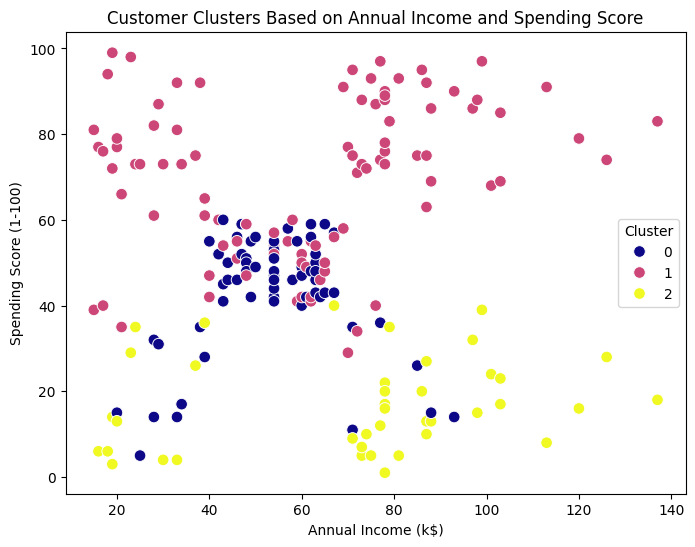

In [84]:
features = df.columns[1:]
X = df[features]

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(X_standardized)

df['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x = df[features[2]], 
    y = df[features[3]], 
    hue = df['Cluster'], 
    palette = 'plasma', 
    s = 70
)
plt.title("Customer Clusters Based on Annual Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title = "Cluster")
plt.show()

### Finding the optimal k

1. **Elbow Method** <br>
This approach involves plotting the Sum of Squared Errors (SSE) or inertia for different values of k.The SSE measures the total distance between data points and their corresponding cluster centroids. As the number of clusters increases, the SSE decreases because data points are assigned to smaller, tighter groups. The "elbow point" in the graph, where the rate of decrease in SSE starts to slow down, suggests the optimal k. While intuitive and straightforward, the Elbow Method can sometimes be subjective, especially if the graph does not show a clear elbow.

2. **Silhouette Score**
It measures how well data points fit within their clusters compared to other clusters. The silhouette score ranges from -1 to 1, with higher values indicating better-defined clusters. This method provides a quantitative way to evaluate clustering performance and is particularly useful for non-spherical clusters. However, it can be computationally expensive for large datasets.

3. **Gap Statistic**
This method compares the SSE of the clustering solution for the actual dataset to that of a dataset generated from a uniform random distribution. The optimal k is determined by the value that maximizes the gap between the actual data and the random reference data. While statistically reliable, this method is computationally intensive because it requires generating and evaluating multiple random datasets.

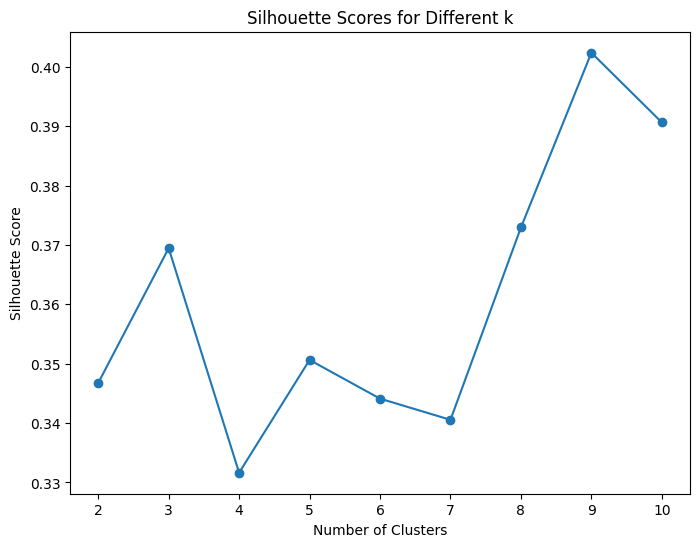

Optimal number of clusters based on silhouette score: 9


In [74]:
k_max = 10
silhouette_scores = []
for k in range(2, k_max + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_standardized)
    score = silhouette_score(X_standardized, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, k_max + 1), silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

optimal_k = range(2, k_max + 1)[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")